In [1]:
# read data
import pandas as pd

df=pd.read_csv('Housing.csv')

df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

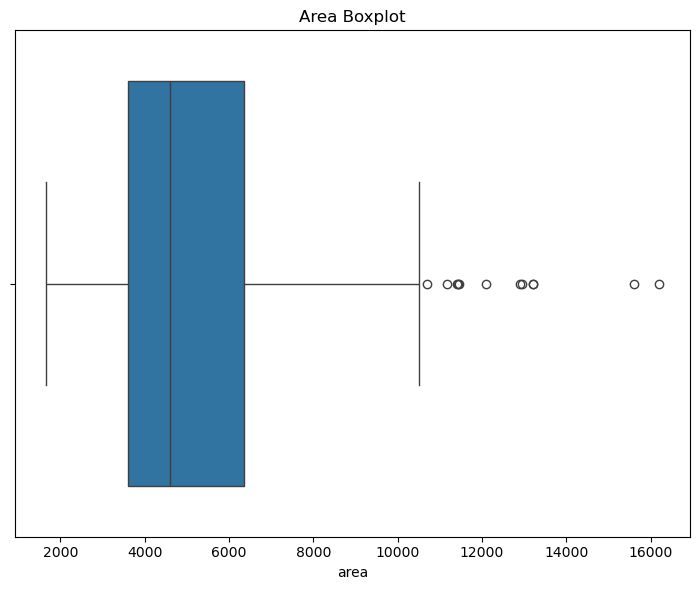

In [2]:
# visualize data to find out their is outlier or not
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2,1)
sns.boxplot(x=df['area'])
plt.title("Area Boxplot")


plt.tight_layout()
plt.show()

In [3]:
# handlie outliet using iqr method
import numpy as np

Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#calculating outliers
outliers=df[(df['area']<lower_bound) | (df['area']>upper_bound)]

#removing outliers
median=df['area'].median()
df['area'] = df['area'].apply(
    lambda x: median if x < lower_bound or x > upper_bound else x
)


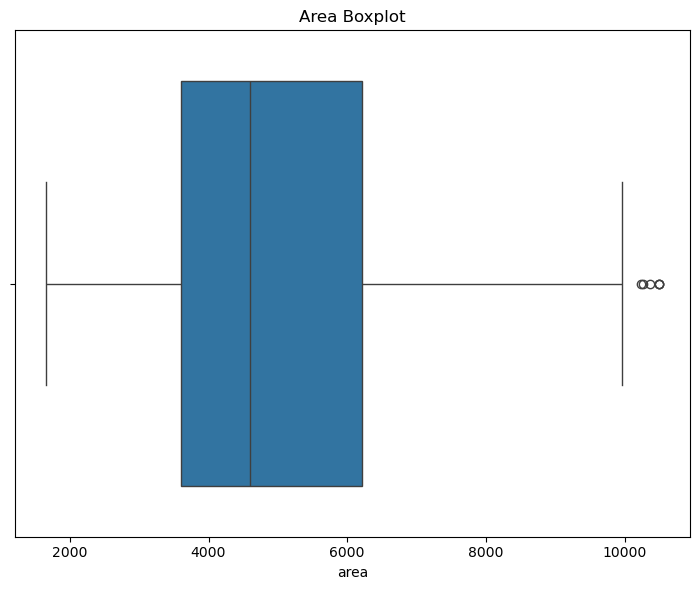

In [4]:
#after removing outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2,1)
sns.boxplot(x=df['area'])
plt.title("Area Boxplot")


plt.tight_layout()
plt.show()

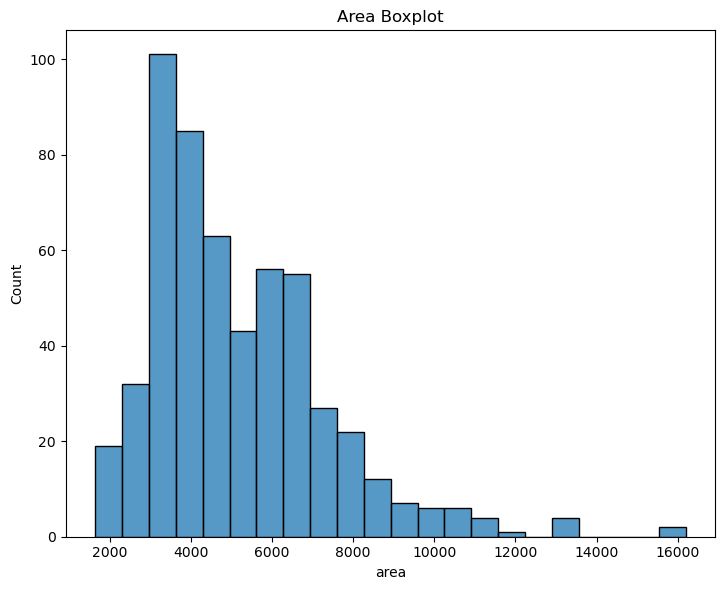

In [3]:
# visualize data to find the skewness of data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(x=df['area'])
plt.title('Area Boxplot')

plt.tight_layout()
plt.show()

In [4]:
# normalize the feature using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled=df.copy()
col_name=['area']

features=df_scaled[col_name]

df_scaled[col_name]=scaler.fit_transform(features.values)
df_scaled

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,0.051546,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,0.135395,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,0.086598,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
import numpy as np

df['log_area']=np.log(df['area'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,8.911934
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,9.100526
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,9.206332
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8.922658
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8.911934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,8.006368
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,7.783224
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,8.194229
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,7.975908


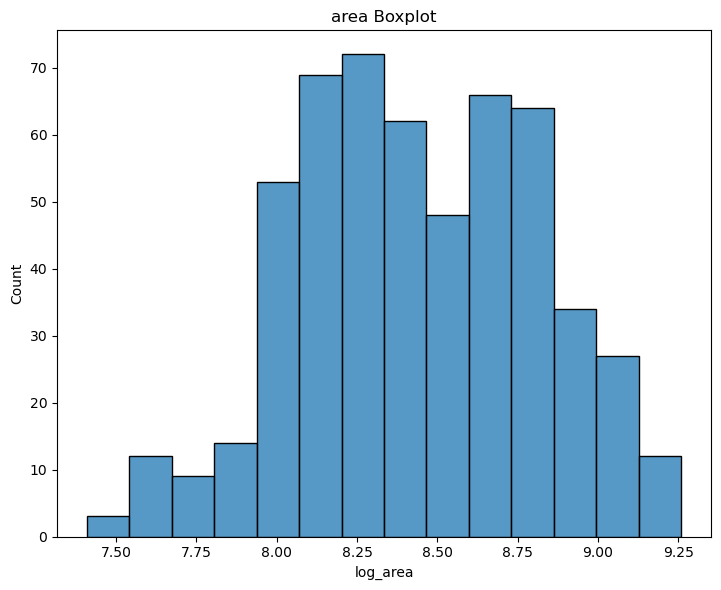

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.subplot(1,2,2)
sns.histplot(x=df['log_area'])
plt.title('area Boxplot')

plt.tight_layout()
plt.show()

In [6]:
# simple linear regression
x=df[['log_area']]
y=df['price']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=model.predict(x_test)
y_pred

array([3338108.11475215, 3622692.11342803, 3595469.64612753,
       5950437.74869172, 3088215.89525237, 4489256.21185798,
       4711520.95785623, 3856735.93513684, 6307915.02776652,
       3978964.96858192, 3978964.96858192, 3831653.25345428,
       5446030.00440424, 5196137.78490447, 6057635.98776682,
       2988600.74870418, 3367869.50851592, 3978964.96858192,
       3914424.07724493, 3257202.79852779, 3856735.93513684,
       4619821.82241169, 3676374.9623519 , 4899343.84279577,
       4017791.74039884, 3243837.7003552 , 7458172.46001877,
       5388008.8634208 , 6162468.82020518, 4917813.03054564,
       4146310.28919056, 4338427.10645927, 2312331.00725676,
       2931728.61705685, 5719755.960667  , 3780820.97429032,
       5613375.32501289, 6199526.73820518, 3055393.26602662,
       7232151.45635125, 4805173.15057448, 4796184.2581117 ,
       5446030.00440424, 6571954.80689706, 6473252.69446794,
       8190209.94979003, 3906253.5203903 , 2491886.27129822,
       3567986.67279055,

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error(MSE):{mse}')
print(f'R-squared(R2):{r2}')

Mean Squared Error(MSE):2436515415934.1147
R-squared(R2):0.18469621156725546


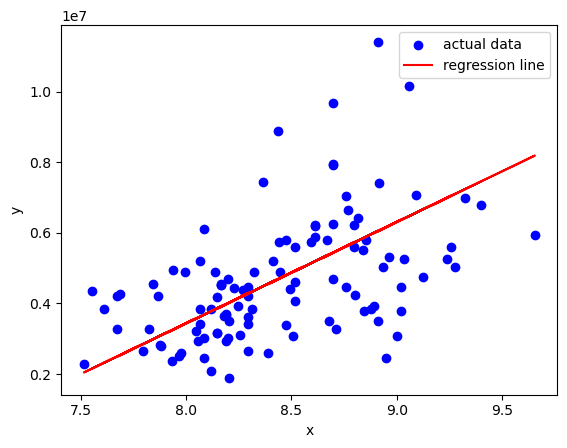

In [13]:
# visualize data 
plt.scatter(x_test,y_test,color='blue',label='actual data')
plt.plot(x_test,y_pred,color='red',label='regression line')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()